In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv('cleaned-070110-123121.csv')

In [4]:
header = ["month"]
for year in range(2010, 2022):
    header.append(year)
total_count = [header]

for month in range(1,13):
    month_count = [calendar.month_name[month][0:3]]
    df_month = df[df["Reported_month"] == month]
    for year in range(2010, 2022):
        if year == 2010 and month <= 6: 
            month_count.append(np.NaN)
            continue
        df_year = df_month[df_month["Reported_year"] == year]
        month_count.append(len(df_year))
    total_count.append(month_count)

df_count = pd.DataFrame(total_count[1:], columns=total_count[0]).set_index("month")

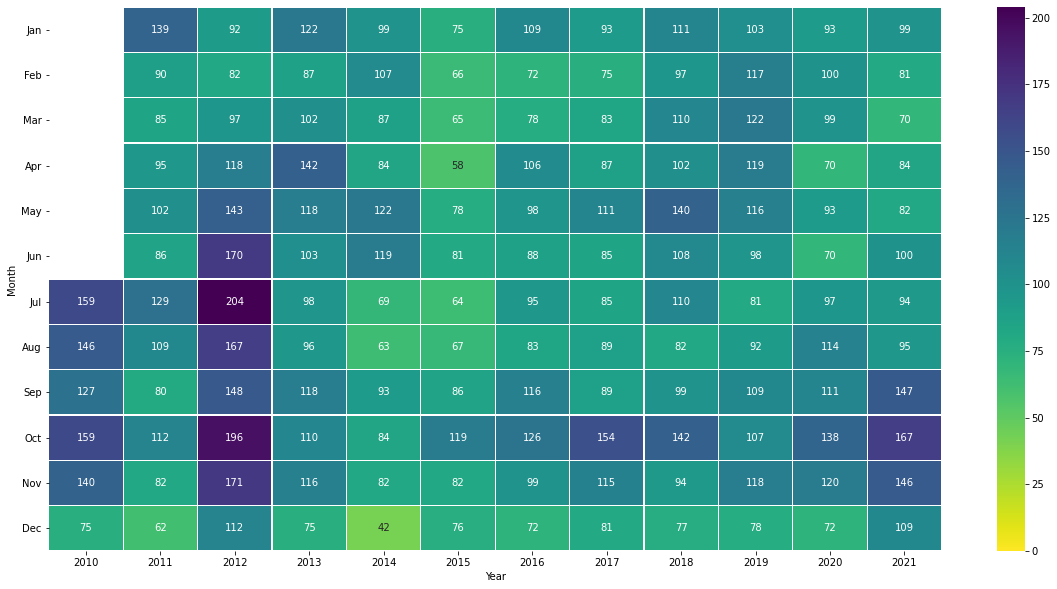

In [5]:
sns.heatmap(df_count, annot=True, fmt = ".0f", linewidths=.25, cmap = "viridis_r",vmin=0)
plt.xticks(rotation = 0)
plt.ylabel("Month")
plt.xlabel("Year")
plt.gcf().set_size_inches(20, 10)